# Computational physics - Problem Set 1

### <div style="text-align: right"> Sumin Alff-Kim : 3282322    <br> Lennart Voorgang: 3124372      </div>

Repository: https://github.com/suminalffkim/ComputationalPhysics
<br>
Repository of this assignment: https://github.com/suminalffkim/ComputationalPhysics/tree/main/1%20-%20Estimate%20of%20PI
<br>
Commit id: **CHANGE HERE !!!!! fa79d6b824fec51d451c9000f017c302698375a3**
<br><br>
**Sollen wir ab 1.2 die standard dev nicht als Uncertainty nennen?<br>Der Tutor hat gesagt, ihm reicht es wenn man pro block kommentiert anstatt jeder Zeile& wir duerfen juypter notebook hochladen und das auch als pdf konvertieren und abgeben.**

## 1.1 Just do one big experiment

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import typing
import scienceplots

plt.style.use(['science', 'notebook'])
plt.rcParams["figure.figsize"] = (12, 8)

In [2]:
#define function to generate the uniform random number with P and X
# and to estimate pi
def estimate_pi(num_samples: float, num_experiments: float) -> typing.Tuple[typing.List[float], typing.List[float], typing.List[float], typing.List[float]]:
  points = np.random.uniform(low=-1.0, high=1.0, size=(2, num_samples, num_experiments))
  radius = (points**2).sum(axis=0)
  inside_circle = radius[(radius <= 1)]

  pi_mean = 4 * (radius <= 1).sum(axis=0) / num_samples
  pi_std = np.sqrt((np.sum((4 * (radius <= 1) - pi_mean)**2, axis=0)) / num_samples)

  return [pi_mean, pi_std, radius, inside_circle]

Estimate PI Mean=3.153. Standard Deviation=1.634


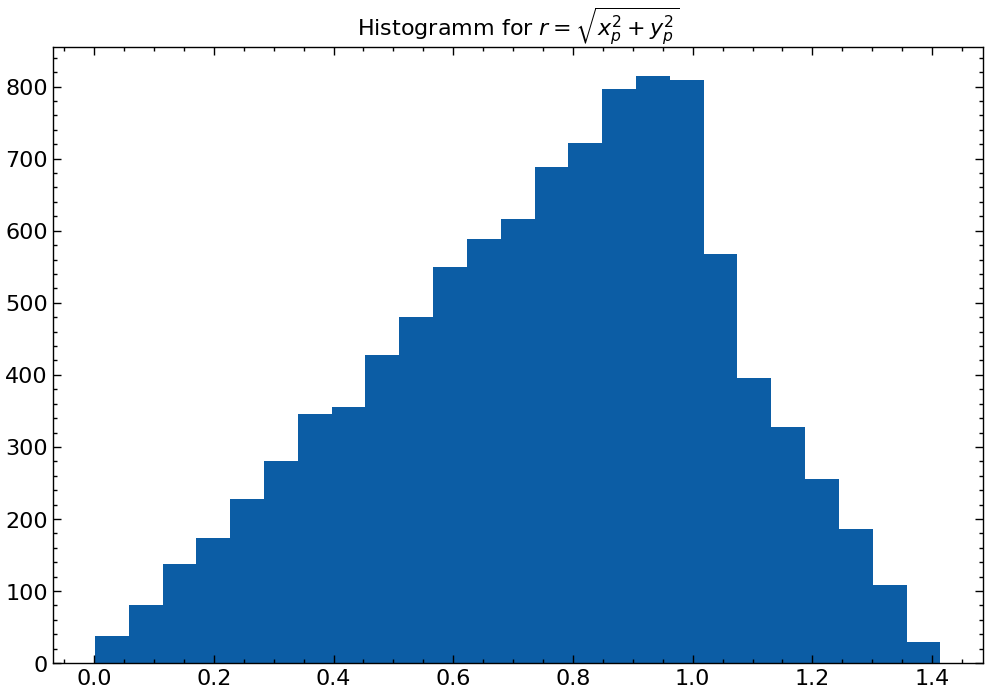

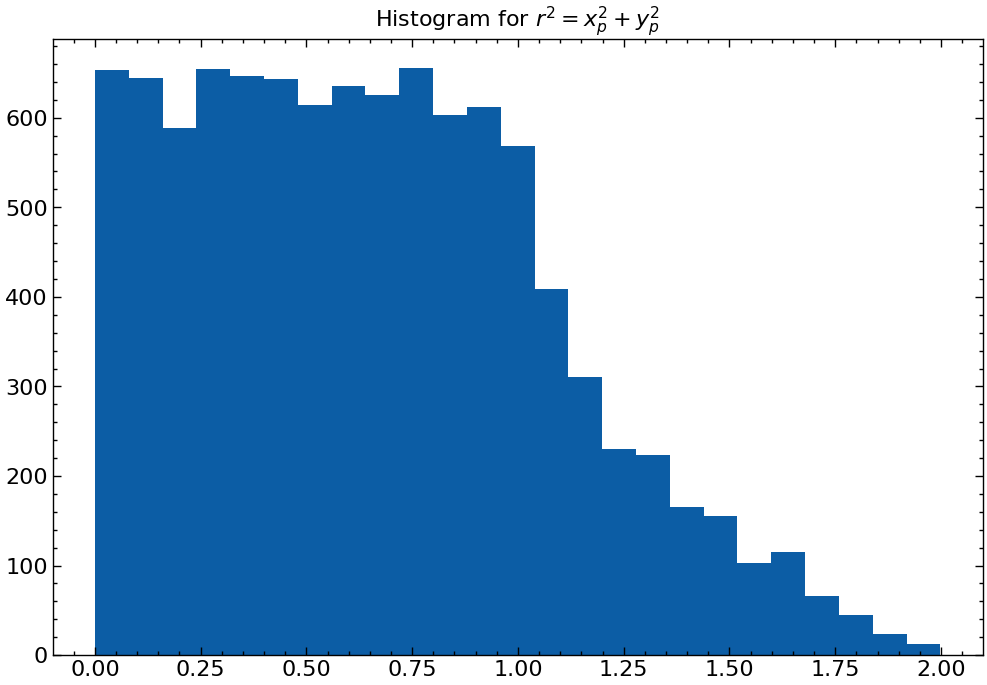

In [3]:
#draw histograms for r and r^2 for P=10000 and X=1
pi_mean, pi_std, radius, inside = estimate_pi(10000, 1)
print(f'Estimate PI Mean={pi_mean[0]:.3f}. Standard Deviation={pi_std[0]:.3f}')

plt.hist(np.sqrt(radius), bins=25)
plt.title('Histogramm for $r = \\sqrt{x_p^2 + y_p^2}$')
plt.show()

plt.hist(radius, bins=25)
plt.title('Histogram for $r^2 = x_p^2 + y_p^2$')
plt.show()




<font color='blue'>**Q. Write a few sentences (which may include mathematics) explaining why the histograms have the features they do to the left of 1 and to the right of 1. In particular explain why the behavior differs so dramatically for values less than 1.**</font><br>
The histgram above shows that the $r^2=x_p^2+y_p^2$.  Since $x,y\in [-1,1]$ can the radius $r$ be $r\in[0,2]$.<br> If $(x,y)=(0,0)$ will $r^2=0^2+0^2=0$ and for $(x,y)=(1,1)$ will $r^2=1^2+1^2=2$. Therefore there are the features left of 1 and right of 1.

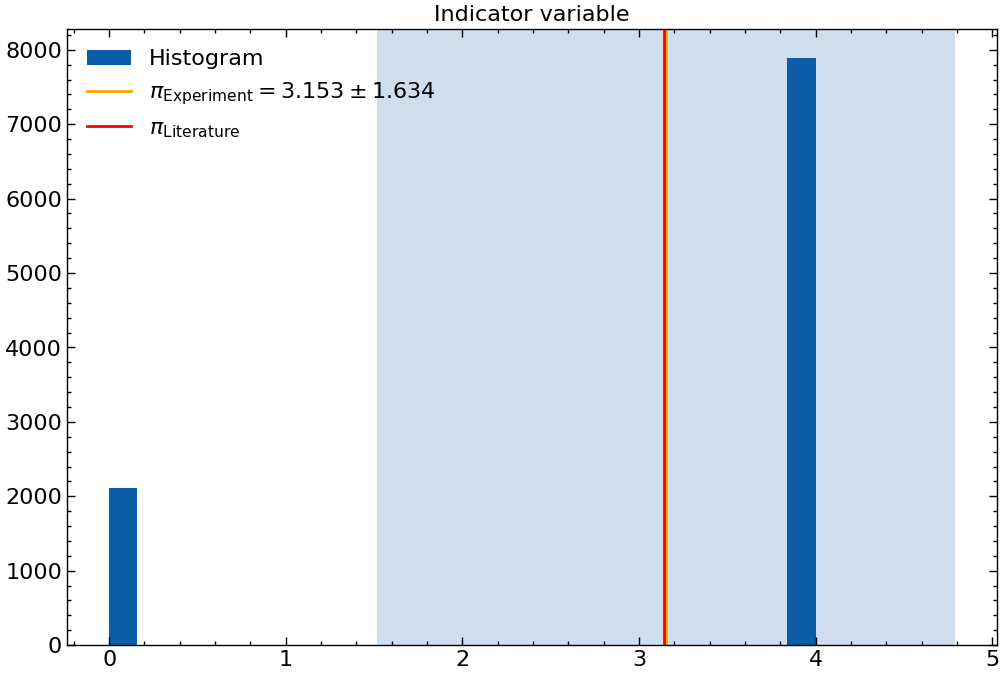

In [4]:
#draw histogram for indicator variable
mean = (4 * (radius <= 1)).mean()
std = (4 * (radius <= 1)).std()

plt.hist(4 * (radius <= 1), bins=25, label='Histogram')
plt.axvline(x=mean, color='orange', label=f'$\\pi_\\text{{Experiment}} = {mean:.3f} \\pm {std:.3f}$')
plt.axvline(x=np.pi, color='red', label='$\\pi_\\text{Literature}$')
plt.axvspan(xmin=mean - std, xmax=mean + std, alpha=0.2)

plt.title('Indicator variable')
plt.legend()

plt.show()

## 1.2 Split into 100 experiments

Estimate PI Mean=3.154. Standard Deviation=0.139


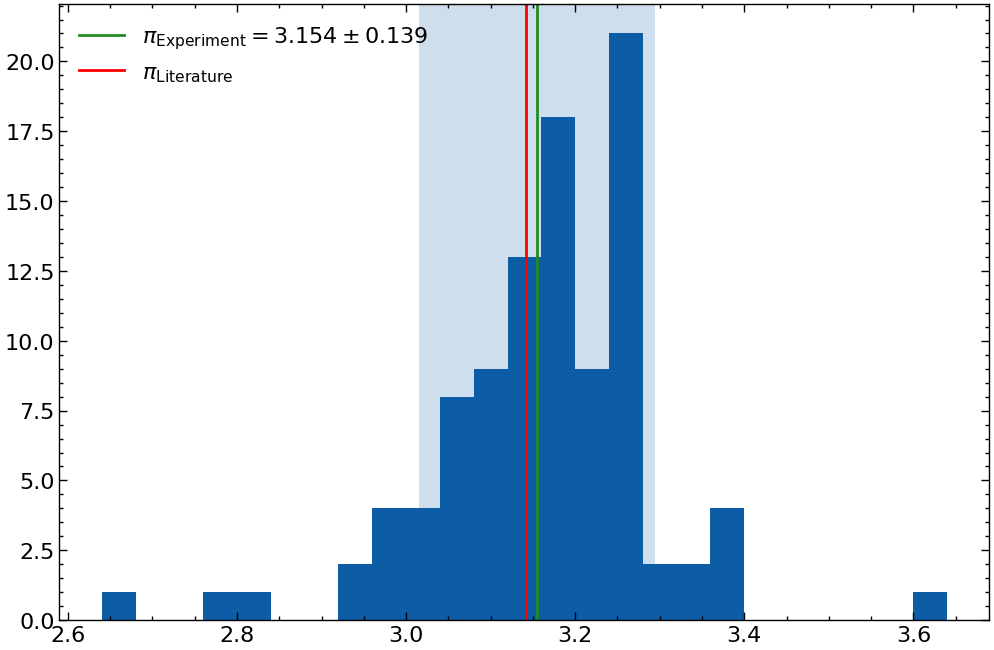

In [5]:
#estimate pi for P=100, X=100 and draw histogram
pi_means, pi_stds, radius, inside = estimate_pi(100, 100)

mean = pi_means.sum() / 100
std = np.sqrt(np.sum((pi_means - mean)**2) / (100-1))
print(f'Estimate PI Mean={mean:.3f}. Standard Deviation={std:.3f}')

plt.hist(pi_means, bins=25)
plt.axvline(x=mean, color='forestgreen', label=f'$\\pi_\\text{{Experiment}} = {mean:.3f} \\pm {std:.3f}$')
plt.axvline(x=np.pi, color='red', label='$\\pi_\\text{Literature}$')
plt.axvspan(xmin=mean - std, xmax=mean + std, alpha=0.2)

plt.legend()
plt.show()

## 1.3 A Zillion Little Experiments

Estimate PI Mean=3.122. Standard Deviation=1.656


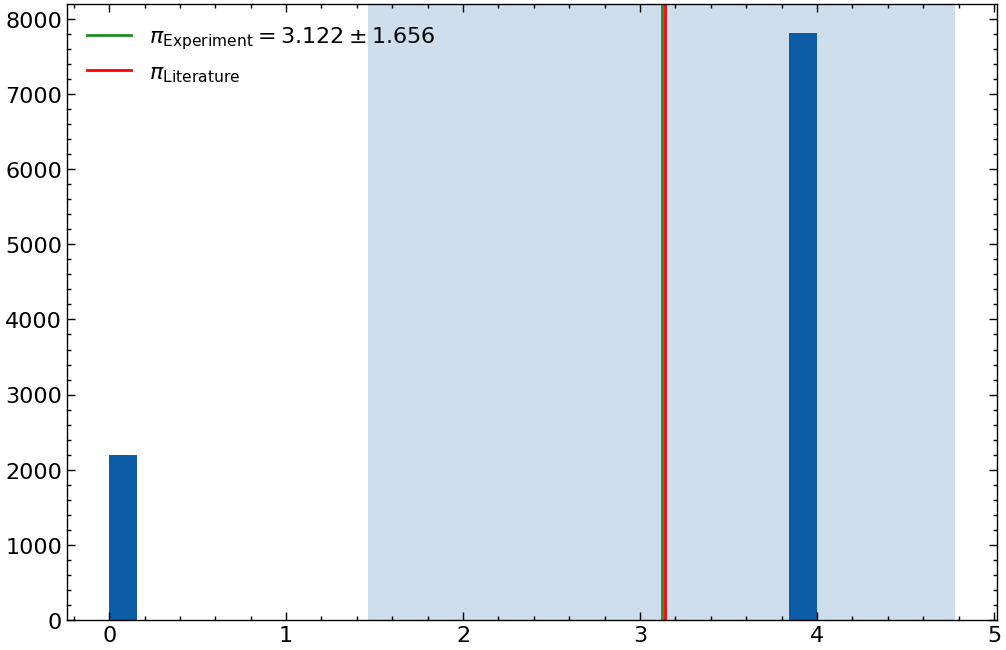

In [6]:
#estimate pi for P=1, X=10000 and draw histogram
pi_means, pi_stds, radius, inside = estimate_pi(1, 10000)

mean = pi_means.sum() / 10000
std = np.sqrt(np.sum((pi_means - mean)**2) / (10000-1))
print(f'Estimate PI Mean={mean:.3f}. Standard Deviation={std:.3f}')

plt.hist(pi_means, bins=25)
plt.axvline(x=mean, color='forestgreen', label=f'$\\pi_\\text{{Experiment}} = {mean:.3f} \\pm {std:.3f}$')
plt.axvline(x=np.pi, color='red', label='$\\pi_\\text{Literature}$')
plt.axvspan(xmin=mean - std, xmax=mean + std, alpha=0.2)

plt.legend()
plt.show()

<font color='blue'>**Q.What do we get if we try P = 1 and X = 10000? In other words, every patient is their own clinical trial. Are the results familiar? Explain**</font>

The histogram is as same as the histogram of part (1.1). The means and standard deviataions/uncertainties are similar each other.

## 1.4 Stop and think


<font color='blue'>**Q.Hopefully you found a standard deviation of about 1.6 for the first case (part 1.1) and an uncertainty of about
0.16 for the second case (part 1.2), even though you used the same number of random pairs, XP = 10000
in each case. (Of course, the exact values may differ a bit, because it’s a randomized computation!)**</font><br>

**Were the estimates of the previous parts compatible with the known value of π?**<br>
The mean values, which the estimated pi is, varies from approx. from 3.09 to 3.17. This is about 1% of fluctation so we can conclude, that the estimates of the previous parts are compatible with the known value.
<br>

**Write a few sentences explaining whether the standard deviation of a single experiment (as in 1.1) makes sense as an uncertainty.**<br>
The uncertainty shows how much the estimations of various of experiments vary from the literature/true value. The standard deviation........
<br>

**Write a few sentences explaining why just reorganizing the way we ‘spent’ our random numbers matters.** <br>
To reduce the uncerntainty, we need to reorganise the way to spent random numbers. In part (1.2), there were 100 experiments of 100 pairs of random numbers and the uncertainty was about 0.16 ~ 0.17, which is much smaller than the standard dev/uncertainty from the part (1.1) and (1.3), which had extrem value of X or P.

## 1.5 More Experiments vs. Longer Experiments


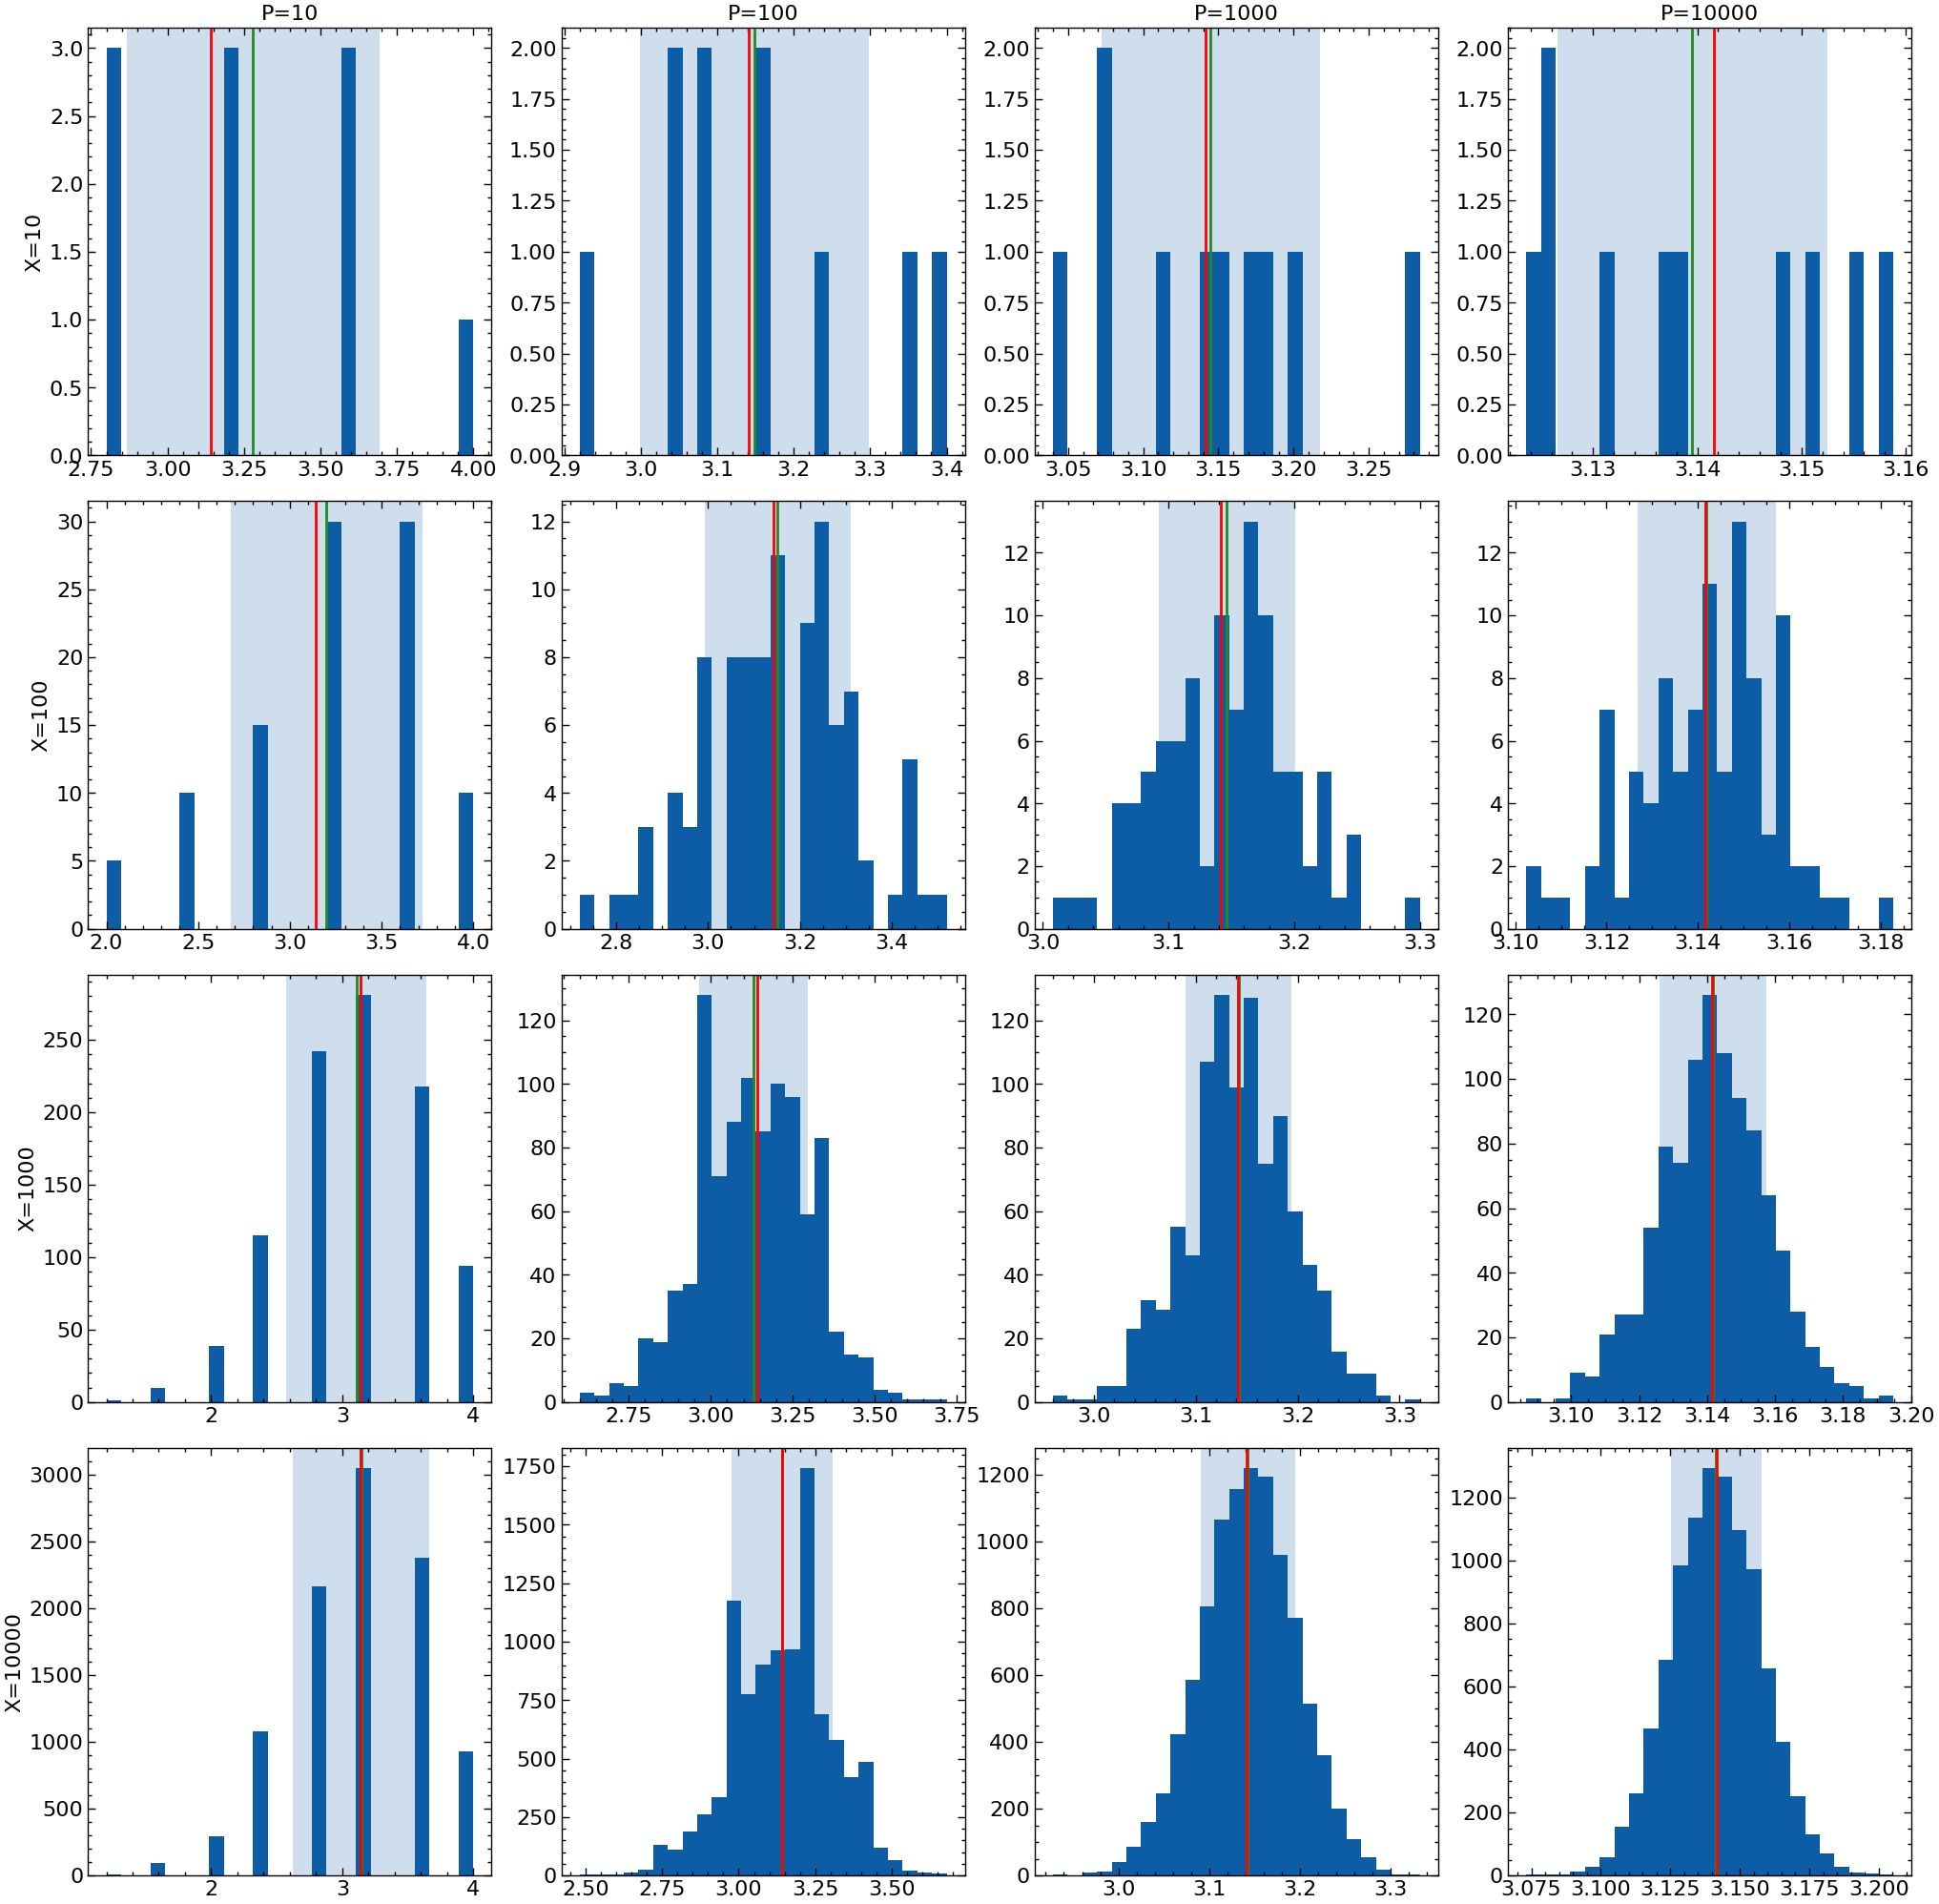

In [7]:
#estimate pi values & uncertainties for 16 pairs of P and X
#and save them for fixed P and fixed X

fixedp_uncertainty = dict()
fixedx_uncertainty = dict()

fig, ax = plt.subplots(4, 4, figsize=(20, 20))
fig.tight_layout()

for (row, num_experiments) in enumerate([10, 100, 1000, 10000]):
    for (col, num_samples) in enumerate([10, 100, 1000, 10000]):
        pi_means, pi_stds, radius, inside = estimate_pi(num_samples, num_experiments)

        mean = pi_means.sum() / num_experiments
        std = np.sqrt(np.sum((pi_means - mean)**2) / (num_experiments-1))

        ax[row, col].hist(pi_means, bins=25)
        ax[row, col].axvline(x=mean, color='forestgreen')
        ax[row, col].axvline(x=np.pi, color='red')
        ax[row, col].axvspan(xmin=mean - std, xmax=mean + std, alpha=0.2)

        if col == 0:
            ax[row, col].set_ylabel(f'X={num_experiments}')
        if row == 0:
            ax[row, col].set_title(f'P={num_samples}')

        if num_samples in fixedp_uncertainty:
            fixedp_uncertainty[num_samples].append((num_experiments, std))
        else:
            fixedp_uncertainty[num_samples] = [(num_experiments, std)]

        if num_experiments in fixedx_uncertainty:
            fixedx_uncertainty[num_experiments].append((num_samples, std))
        else:
            fixedx_uncertainty[num_experiments] = [(num_samples, std)]


<font color='blue'>**Q. If you can only afford a fixed number of random pairs across all experiments XP, how should you spend them? Use the 16 results to explain what you mean.**</font><br>

The X and P values should large enough. X value should lager than P value.
<br>
Compare the uncertainties from [(X=10000, P=1000),(X=1000, P=10000)] or [(X=10000, P=100), (X=1000, P=1000)] pairs.

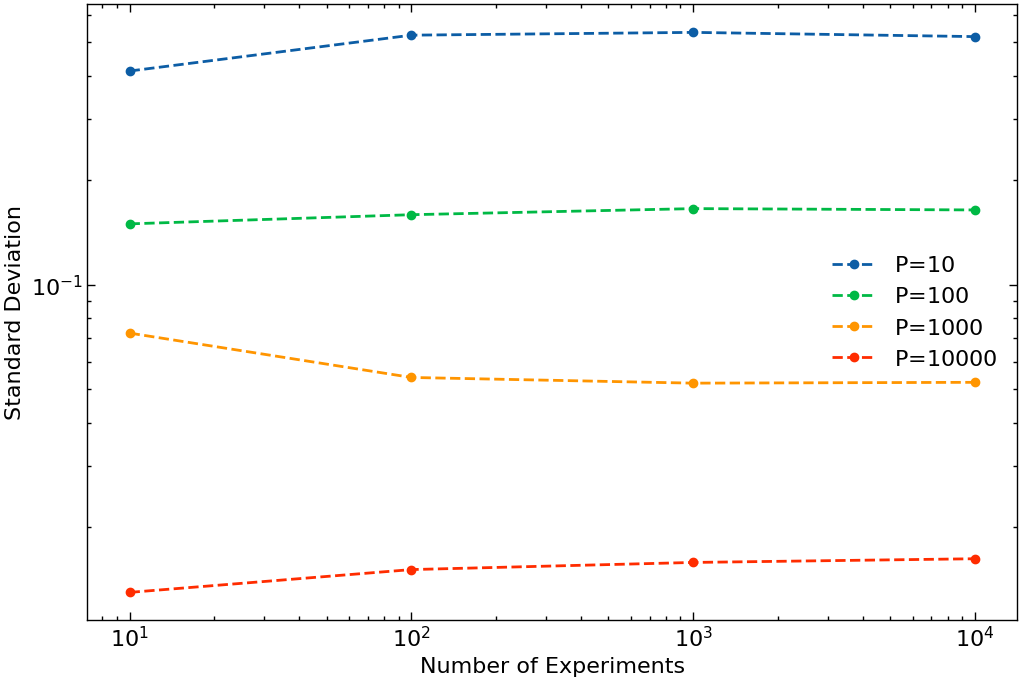

In [8]:
#plot uncertainties against X or P for fixed P/X

for p in fixedp_uncertainty:
    xarr = [item[0] for item in fixedp_uncertainty[p]]
    yarr = [item[1] for item in fixedp_uncertainty[p]]

    plt.loglog(xarr, yarr, 'o--', label=f'P=${p}$')

plt.xlabel('Number of Experiments')
plt.ylabel('Standard Deviation')
plt.legend()

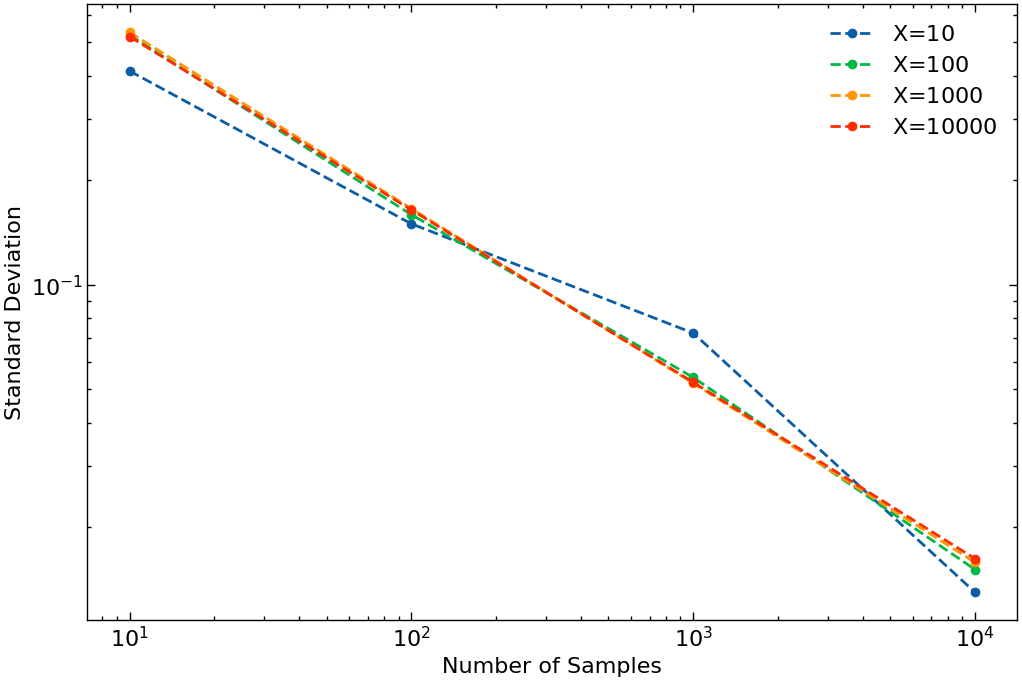

In [9]:
for x in fixedx_uncertainty:
    xarr = [item[0] for item in fixedx_uncertainty[x]]
    yarr = [item[1] for item in fixedx_uncertainty[x]]

    plt.loglog(xarr, yarr, 'o--', label=f'X=${x}$')

plt.xlabel('Number of Samples')
plt.ylabel('Standard Deviation')
plt.legend()

<font color='blue'>**• Write a few sentences explaining what you see.**</font>
<br>
The above plot shows that the uncertainty have nearly linear relationship with the Number of Samples (P). <br>
The fluctation of uncertatines after certain number of experiements (X) are not large//// are relativ small.......
For the uncertainties have after certain number of experiments (X) relativ similar values. 